In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_29.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_244.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_135.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_200.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_124.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_94.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_89.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_270.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_238.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_68.jpg
/kaggle/input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from PIL import Image

## Rasmlarni DataFrame ko'rinishiga keltirish

In [7]:
root="/kaggle/input/lemon-quality-dataset/lemon_dataset/"

In [8]:
clases=os.listdir(root)
clases

['empty_background', 'good_quality', 'bad_quality', '.git']

In [9]:
clases.remove('.git')

In [10]:
imagenes=[]
estado=[]
for clase in clases:
    directorio = root + clase + '/'
    for imagen in os.listdir(directorio):
        imagenes.append(directorio + imagen)
        estado.append(clase)

In [11]:
imagenes=pd.Series(imagenes, name="Imagen")
estado=pd.Series(estado, name="Calidad")

In [12]:
df=pd.concat([imagenes, estado], axis=1)
df.sample(10)

,Imagen,Calidad
1233,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
549,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
1100,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
555,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
2231,/kaggle/input/lemon-quality-dataset/lemon_data...,bad_quality
1008,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
462,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
2118,/kaggle/input/lemon-quality-dataset/lemon_data...,bad_quality
676,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
1183,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality


In [13]:
df = df[df['Calidad'].isin(['good_quality', 'bad_quality'])]


In [14]:
df

,Imagen,Calidad
452,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
453,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
454,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
455,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
456,/kaggle/input/lemon-quality-dataset/lemon_data...,good_quality
...,...,...
2523,/kaggle/input/lemon-quality-dataset/lemon_data...,bad_quality
2524,/kaggle/input/lemon-quality-dataset/lemon_data...,bad_quality
2525,/kaggle/input/lemon-quality-dataset/lemon_data...,bad_quality
2526,/kaggle/input/lemon-quality-dataset/lemon_data...,bad_quality


In [15]:
df = df.rename(columns = {
    "Imagen" : "image_path",
    "Calidad" : "label"
})

In [16]:
df.label.value_counts()

label
good_quality    1125
bad_quality      951
Name: count, dtype: int64

In [17]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

images = []
labels = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    img_path = row['image_path']  
    label = row['label']          

    try:
        img = Image.open(img_path).convert('RGB')
        img = img.resize((300, 300))
        img_array = np.array(img) / 255.0

        images.append(img_array)
        labels.append(label)

    except Exception as e:
        print(f" Xatolik rasmni ochishda: {img_path}\n {e}")


100%|██████████| 2076/2076 [00:23<00:00, 86.67it/s]


In [18]:
X = np.array(images)
y = np.array(labels)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [20]:
y_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
y = np.array(y_encoded)

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

import os
import numpy as np
import random
import tensorflow as tf

def set_seed(seed=1):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seed(1)
tf.config.experimental.enable_op_determinism()
# 2. Ma'lumotlarni train/val/test ga bo'lamiz (random_state bilan aniq bo'linadi)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=1000,
    shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    shuffle=True
)

# 3. Modelni yaratamiz
model = Sequential([
    Input(shape=(300,300,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Modelni o'qitamiz
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    shuffle=True
)


2025-06-19 12:12:52.153171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750335172.329489      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750335172.380702      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1750335185.837927      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/10


2025-06-19 12:13:12.104204: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
I0000 00:00:1750335194.230183     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5237 - loss: 3.6475

2025-06-19 12:13:20.631683: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.5268 - loss: 3.5957 - val_accuracy: 0.8217 - val_loss: 0.4149
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.8443 - loss: 0.3764 - val_accuracy: 0.8916 - val_loss: 0.2611
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9065 - loss: 0.2479 - val_accuracy: 0.9108 - val_loss: 0.1966
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9412 - loss: 0.1633 - val_accuracy: 0.9422 - val_loss: 0.1279
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9547 - loss: 0.1278 - val_accuracy: 0.9205 - val_loss: 0.1744
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9502 - loss: 0.1479 - val_accuracy: 0.9470 - val_loss: 0.1166
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9721 - loss: 0.0952 - val_accuracy: 0.9518 - val_loss: 0.1065
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9737 - loss: 0.0759 - val_accuracy: 0.9590 - val

In [24]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f" Test loss: {loss:.4f}")
print(f" Test accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9597 - loss: 0.1116
 Test loss: 0.1284
 Test accuracy: 0.9519


In [38]:
def show_prediction(img, prediction, true_label=None):
    pred_label = int(prediction >= 0.5)
    probability = float(prediction) * 100

    # Piksellarni to'g'ri ko'rsatish uchun mos formatga o'tkazamiz
    if img.max() <= 1.0:
        display_img = img  # all good
    else:
        display_img = img.astype("uint8")

    plt.imshow(display_img)
    plt.axis("off")

    title = f"Bashorat: {pred_label} | Ehtimollik: {probability:.2f}%"
    
    # if true_label is not None:
    #     title += f" | Haqiqiy: {int(true_label)}"
    #     color = 'green' if pred_label == int(true_label) else 'red'
    # else:
    #     color = 'black'

    plt.title(title, fontsize=12, color="black")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


2025-06-19 12:23:47.159709: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


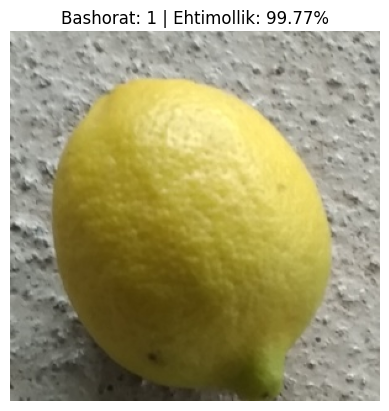

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


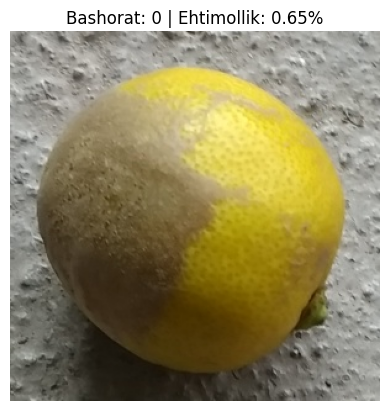

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


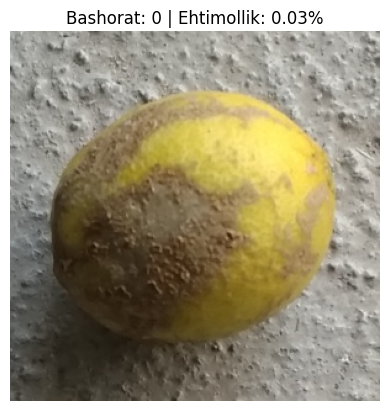

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


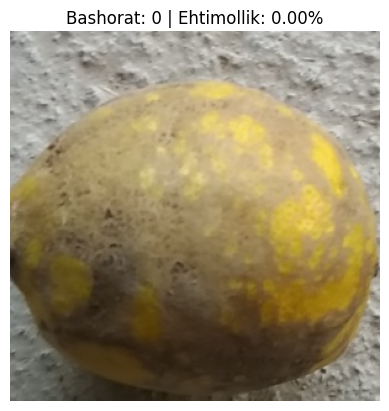

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


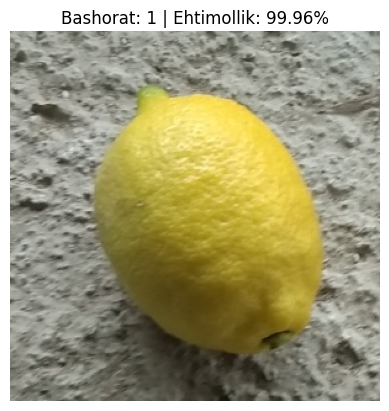

In [39]:
num_images_to_show = 5
random_indices = np.random.choice(len(X_test), size=num_images_to_show, replace=False)

sample_images = X_test[random_indices]
sample_labels = y_test[random_indices]

for i in range(num_images_to_show):
    img = sample_images[i]
    true_label = sample_labels[i]

    pred = model.predict(np.expand_dims(img, axis=0))[0][0]
    show_prediction(img, pred, true_label=true_label)

In [83]:
import joblib 

filename = "Lemon_model.jbl"
joblib.dump(model, filename)

['Lemon_model.jbl']

In [84]:
lemon_model = joblib.load(filename)

In [85]:
lemon_model

<Sequential name=sequential_2, built=True>

In [36]:
import pandas as pd
hdfobj = pd.HDFStore("lemon_model.h5")